In [2]:
import pandas as pd
import numpy as np
from skimpy import skim
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import OneHotEncoder
import optuna
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import learning_curve
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import warnings
from tqdm.auto import tqdm

warnings.filterwarnings('ignore')
tqdm.pandas()
plt.style.use('ggplot')

In [3]:
df = pd.read_csv('student_not_split.csv')

In [4]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 27882  │ │ string      │ 7     │                                                          │
│ │ Number of columns │ 14     │ │ float64     │ 6     │                                                          │
│ └───────────────────┴────────┘ │ int64       │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name            ┃ NA  ┃ NA %  ┃ mean     ┃ sd       ┃ p0    ┃ p25   ┃ p50   ┃ p75   ┃ p100 ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━╇━━━━━━━━┩  │
│ │ Age                    │   0 │     0 │    25.82 │    4.904 │    18 │    21 │    25 │    30 │   59 │  ▇▇▃   │  │
│ │ Academic Pressure      │   0 │     0 │    3.142 │     1.38 │     1 │     2 │     3 │     4 │    5 │ ▅▅ ▇▆▇ │  │
│ │ CGPA                   │   0 │     0 │    7.659 │    1.464 │  5.03 │  6.29 │  7.77 │  8.92 │   10 │ ▇▅▇▇▇▇ │  │
│ │ Study Satisfaction     │   0 │     0 │    2.945 │     1.36 │     1 │     2 │     3 │     4 │    5 │ ▇▇ ▇▇▆ │  │
│ │ Work/Study Hours       │   0 │     0 │    7.157 │    3.707 │     0 │     4 │     8 │    10 │   12 │ ▂▂▂▃▃▇ │  │
│ │ Financial Stress       │   0 │     0 │     3.14 │    1.437 │     1 │     2 │     3 │     4 │    5 │ ▆▆ ▆▇▇ │  │
│ │ Depression             │   0 │     0 │   0.5855 │   0.4926 │     0 │     0 │     1 │     1 │    1 │ ▆    ▇ │  │
│ └────────────────────────┴─────┴───────┴──────────┴──────────┴───────┴───────┴───────┴───────┴──────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                           ┃ NA    ┃ NA %      ┃ words per row            ┃ total words         ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ Gender                                │     0 │         0 │                        1 │               27882 │  │
│ │ City                                  │     0 │         0 │                        1 │               27886 │  │
│ │ Sleep Duration                        │     0 │         0 │                        3 │               84447 │  │
│ │ Dietary Habits                        │     0 │         0 │                        1 │               27886 │  │
│ │ Degree                                │     0 │         0 │                      1.2 │               33954 │  │
│ │ Have you ever had suicidal thoughts ? │     0 │         0 │                        1 │               27882 │  │
│ │ Family History of Mental Illness      │     0 │         0 │                        1 │               27882 │  │
│ └───────────────────────────────────────┴───────┴───────────┴──────────────────────────┴─────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [5]:
df.head()

,Gender,Age,City,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,33.0,Visakhapatnam,5.0,8.97,2.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,Female,24.0,Bangalore,2.0,5.90,5.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,Male,31.0,Srinagar,3.0,7.03,5.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,Female,28.0,Varanasi,3.0,5.59,2.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,Female,25.0,Jaipur,4.0,8.13,3.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


In [ ]:
def preprocess_data(X: pd.DataFrame,
                    seed: float = 42) -> pd.DataFrame:

    np.random.seed(seed)
    X = X.copy()

    for col in X.columns:
        if X[col].nunique(dropna=True) == 2:
            unique_values = X[col].dropna().unique()
            mapping = {value: idx for idx, value in enumerate(unique_values)}
            X[col] = X[col].map(mapping)

    X['Sleep Duration'] = X['Sleep Duration'].apply(
        lambda value: (
            0 if value in ["Less than 5 hours", "2-3 hours", "3-4 hours", "4-5 hours", "No"]
            else 1 if value in ["5-6 hours", "6-7 hours", "4-6 hours"]
            else 2 if value in ["7-8 hours"]
            else 3 if value in ["8-9 hours", "More than 8 hours", "9-11 hours", "10-11 hours"]
            else np.random.choice([0, 1, 2, 3])
        )
    )

    X['Dietary Habits'] = X['Dietary Habits'].apply(
        lambda value: (
            0 if value in ["Unhealthy", "No Healthy", "No", "1", 1]
            else 1 if value in ["Moderate", "Less Healthy", "Less than Healthy", "2", 2]
            else 2 if value in ["Healthy", "More Healthy", "Yes", "3", 3]
            else np.random.choice([0, 1, 2])
        )
    )

    return X

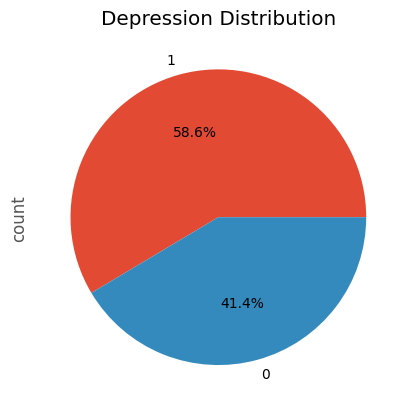

In [6]:
df['Depression'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Depression Distribution')
plt.show()

In [7]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :-1], df.iloc[:, -1], test_size=0.2, random_state=42)

In [8]:
X_train = preprocess_data(X_train)
X_test = preprocess_data(X_test)

In [9]:
skim(X_train)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 22305  │ │ float64     │ 6     │                                                          │
│ │ Number of columns │ 13     │ │ int64       │ 5     │                                                          │
│ └───────────────────┴────────┘ │ string      │ 2     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name              ┃ NA  ┃ NA %  ┃ mean    ┃ sd      ┃ p0    ┃ p25   ┃ p50   ┃ p75   ┃ p100 ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━╇━━━━━━━━┩  │
│ │ Gender                   │   0 │     0 │  0.4398 │  0.4964 │     0 │     0 │     0 │     1 │    1 │ ▇    ▆ │  │
│ │ Age                      │   0 │     0 │   25.83 │   4.901 │    18 │    21 │    25 │    30 │   59 │  ▇▇▃   │  │
│ │ Academic Pressure        │   0 │     0 │   3.145 │    1.38 │     1 │     2 │     3 │     4 │    5 │ ▅▅ ▇▅▇ │  │
│ │ CGPA                     │   0 │     0 │    7.66 │   1.467 │  5.03 │  6.29 │  7.77 │  8.93 │   10 │ ▇▅▇▇▇▇ │  │
│ │ Study Satisfaction       │   0 │     0 │   2.935 │    1.36 │     1 │     2 │     3 │     4 │    5 │ ▇▇ ▇▇▆ │  │
│ │ Sleep Duration           │   0 │     0 │     1.4 │   1.126 │     0 │     0 │     1 │     2 │    3 │ ▇ ▆ ▇▆ │  │
│ │ Dietary Habits           │   0 │     0 │  0.9057 │   0.796 │     0 │     0 │     1 │     2 │    2 │ ▇  ▇ ▆ │  │
│ │ Have you ever had        │   0 │     0 │  0.6313 │  0.4825 │     0 │     0 │     1 │     1 │    1 │ ▅    ▇ │  │
│ │ suicidal thoughts ?      │     │       │         │         │       │       │       │       │      │        │  │
│ │ Work/Study Hours         │   0 │     0 │   7.157 │   3.709 │     0 │     4 │     8 │    10 │   12 │ ▂▂▂▃▃▇ │  │
│ │ Financial Stress         │   0 │     0 │   3.144 │   1.438 │     1 │     2 │     3 │     4 │    5 │ ▆▆ ▆▇▇ │  │
│ │ Family History of Mental │   0 │     0 │  0.4828 │  0.4997 │     0 │     0 │     0 │     1 │    1 │ ▇    ▇ │  │
│ │ Illness                  │     │       │         │         │       │       │       │       │      │        │  │
│ └──────────────────────────┴─────┴───────┴─────────┴─────────┴───────┴───────┴───────┴───────┴──────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name               ┃ NA      ┃ NA %       ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ City                      │       0 │          0 │                            1 │                    22309 │  │
│ │ Degree                    │       0 │          0 │                          1.2 │                    27121 │  │
│ └───────────────────────────┴─────────┴────────────┴──────────────────────────────┴──────────────────────────┘  │
╰────────────────────────────────────────────────────── 

In [10]:
skim(X_test)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 5577   │ │ float64     │ 6     │                                                          │
│ │ Number of columns │ 13     │ │ int64       │ 5     │                                                          │
│ └───────────────────┴────────┘ │ string      │ 2     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name              ┃ NA  ┃ NA %  ┃ mean    ┃ sd      ┃ p0    ┃ p25   ┃ p50   ┃ p75   ┃ p100 ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━╇━━━━━━━━┩  │
│ │ Gender                   │   0 │     0 │  0.4547 │   0.498 │     0 │     0 │     0 │     1 │    1 │ ▇    ▇ │  │
│ │ Age                      │   0 │     0 │    25.8 │   4.918 │    18 │    21 │    26 │    30 │   58 │  ▇▇▃   │  │
│ │ Academic Pressure        │   0 │     0 │   3.133 │   1.383 │     1 │     2 │     3 │     4 │    5 │ ▅▅ ▇▆▇ │  │
│ │ CGPA                     │   0 │     0 │   7.655 │   1.456 │  5.03 │  6.28 │  7.79 │  8.91 │   10 │ ▇▅▇▇▇▇ │  │
│ │ Study Satisfaction       │   0 │     0 │   2.983 │    1.36 │     1 │     2 │     3 │     4 │    5 │ ▆▇ ▇▇▆ │  │
│ │ Sleep Duration           │   0 │     0 │   1.394 │   1.129 │     0 │     0 │     1 │     2 │    3 │ ▇ ▆ ▇▆ │  │
│ │ Dietary Habits           │   0 │     0 │  0.8998 │  0.8009 │     0 │     0 │     1 │     2 │    2 │ ▇  ▇ ▆ │  │
│ │ Have you ever had        │   0 │     0 │  0.6389 │  0.4804 │     0 │     0 │     1 │     1 │    1 │ ▅    ▇ │  │
│ │ suicidal thoughts ?      │     │       │         │         │       │       │       │       │      │        │  │
│ │ Work/Study Hours         │   0 │     0 │    7.16 │   3.699 │     0 │     4 │     8 │    10 │   12 │ ▂▂▂▃▃▇ │  │
│ │ Financial Stress         │   0 │     0 │   3.122 │   1.435 │     1 │     2 │     3 │     4 │    5 │ ▆▆ ▆▇▇ │  │
│ │ Family History of Mental │   0 │     0 │  0.4888 │  0.4999 │     0 │     0 │     0 │     1 │    1 │ ▇    ▇ │  │
│ │ Illness                  │     │       │         │         │       │       │       │       │      │        │  │
│ └──────────────────────────┴─────┴───────┴─────────┴─────────┴───────┴───────┴───────┴───────┴──────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name               ┃ NA      ┃ NA %       ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ City                      │       0 │          0 │                            1 │                     5577 │  │
│ │ Degree                    │       0 │          0 │                          1.2 │                     6833 │  │
│ └───────────────────────────┴─────────┴────────────┴──────────────────────────────┴──────────────────────────┘  │
╰────────────────────────────────────────────────────── 

In [11]:
column_transformer = ColumnTransformer([
    ('encoder', OneHotEncoder(), X_train.select_dtypes(include='object').columns)
], remainder='passthrough', sparse_threshold=0)


In [12]:
def get_feature_importance(X: pd.DataFrame,
                           y: pd.Series,
                           model: any,
                           random_state: int = 42) -> dict:

    np.random.seed(random_state)
    X = X.copy()
    random_feature = np.random.rand(X.shape[0])

    X['random_feature'] = random_feature

    model.fit(X, y)

    feature_importance = model.feature_importances_

    return {col: importance for col, importance in zip(X.columns, feature_importance)}

In [13]:
def plot_feature_importance(X: pd.DataFrame,
                            y: pd.Series,
                            model: any,
                            random_state: int = 42) -> None:

    feature_importance = get_feature_importance(X, y, model, random_state)

    feature_importance = dict(sorted(feature_importance.items(), key=lambda x: x[1], reverse=True))

    feature_names = list(feature_importance.keys())
    importances = list(feature_importance.values())

    random_feature_index = feature_names.index('random_feature')

    colors = ['blue' if i == random_feature_index else 'gray' for i in range(len(feature_names))]

    plt.bar(feature_names, importances, color=colors)
    plt.xlabel('Features')
    plt.ylabel('Importance')
    plt.title(f'{model.__class__.__name__} Feature Importance')
    plt.xticks([])
    plt.show()

In [14]:
transformed_data = column_transformer.fit_transform(X_train)
column_names = column_transformer.get_feature_names_out()
df_transformed = pd.DataFrame(transformed_data, columns=column_names)

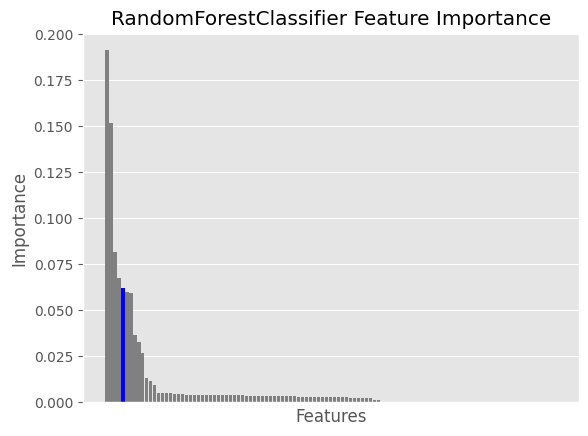

In [15]:
plot_feature_importance(df_transformed, y_train, RandomForestClassifier(random_state=42))

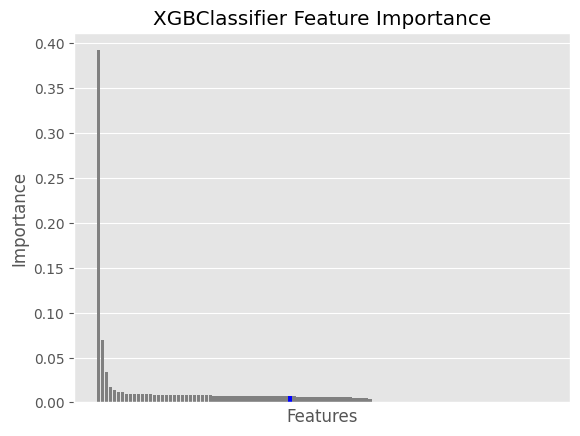

In [16]:
plot_feature_importance(df_transformed, y_train, XGBClassifier(random_state=42))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 13042, number of negative: 9263
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000711 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 678
[LightGBM] [Info] Number of data points in the train set: 22305, number of used features: 69
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.584712 -> initscore=0.342147
[LightGBM] [Info] Start training from score 0.342147


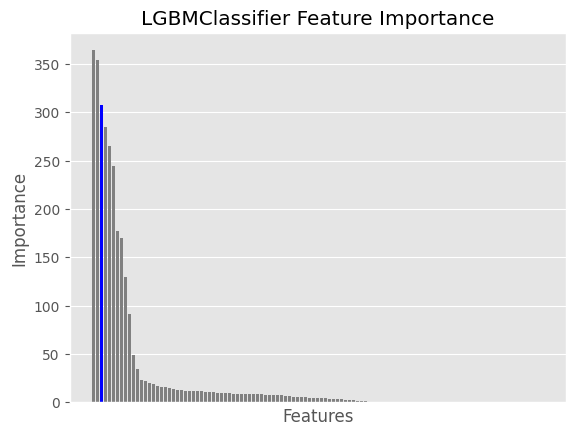

In [17]:
plot_feature_importance(df_transformed, y_train, LGBMClassifier(random_state=42))

In [18]:
def plot_learning_curves(X: pd.DataFrame,
                         y: pd.Series) -> None:
    models = {
        'Random Forest': RandomForestClassifier(),
        'XGBoost': XGBClassifier(),
        'Logistic Regression': make_pipeline(StandardScaler(), LogisticRegression()),
        'SVM (RBF Kernel)': make_pipeline(StandardScaler(), SVC(kernel='rbf'))
    }

    column_transformer = ColumnTransformer([
        ('encoder', OneHotEncoder(drop='first', max_categories=10, handle_unknown="ignore"), X.select_dtypes(include='object').columns)
    ], remainder='passthrough', sparse_threshold=0)

    pipelines = {
        'Random Forest': make_pipeline(column_transformer, models['Random Forest']),
        'XGBoost': make_pipeline(column_transformer, models['XGBoost']),
        'Logistic Regression': make_pipeline(column_transformer, models['Logistic Regression']),
        'SVM (RBF Kernel)': make_pipeline(column_transformer, models['SVM (RBF Kernel)'])
    }

    for model_name, model in tqdm(pipelines.items(), desc='Computing Learning Curves'):
        train_sizes, train_scores, val_scores = learning_curve(model, X, y, cv=3, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1)

        train_scores_mean = np.mean(train_scores, axis=1)
        train_scores_std = np.std(train_scores, axis=1)
        val_scores_mean = np.mean(val_scores, axis=1)
        val_scores_std = np.std(val_scores, axis=1)

        plt.figure()
        plt.title(f'Learning Curve - {model_name}')
        plt.xlabel("Training size")
        plt.ylabel("Accuracy")
        plt.grid()

        plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
        plt.fill_between(train_sizes, val_scores_mean - val_scores_std, val_scores_mean + val_scores_std, alpha=0.1, color="g")
        plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training Accuracy")
        plt.plot(train_sizes, val_scores_mean, 'o-', color="g", label="Validation Accuracy")

        plt.legend(loc="best")

    plt.show()


Computing Learning Curves:   0%|          | 0/4 [00:00<?, ?it/s]

/opt/anaconda3/envs/backup/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0, 1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/anaconda3/envs/backup/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0, 1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/anaconda3/envs/backup/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0, 1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/anaconda3/envs/backup/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0, 1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/anaconda3/envs/backup/lib/pytho

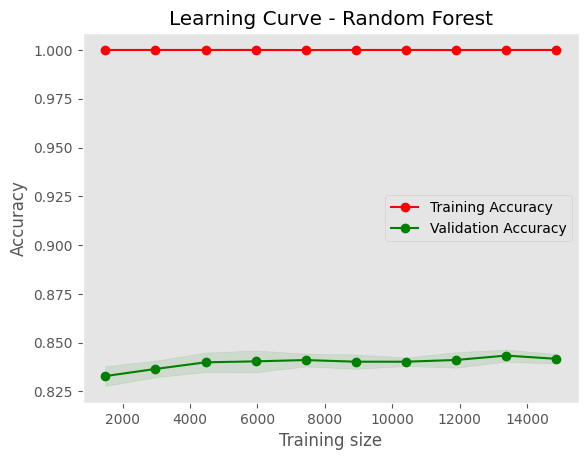

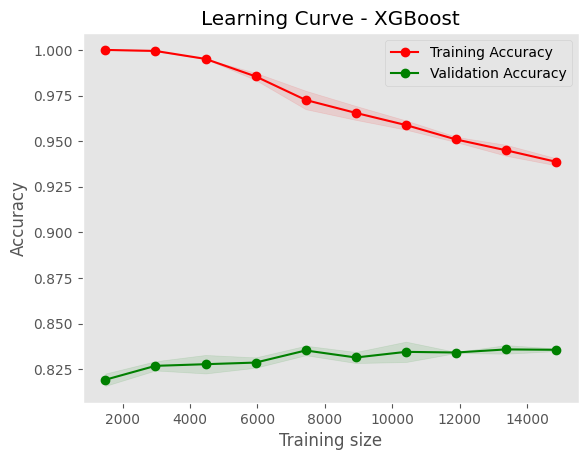

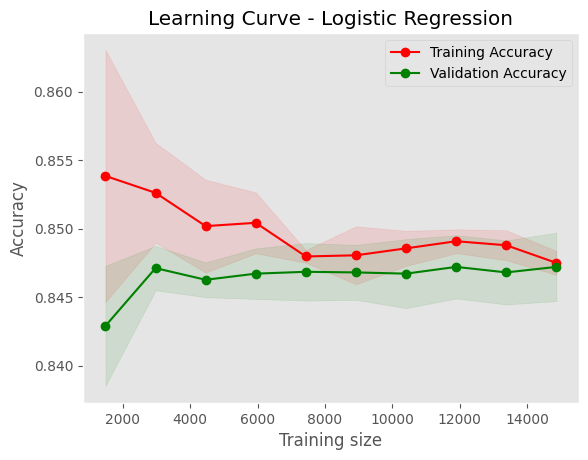

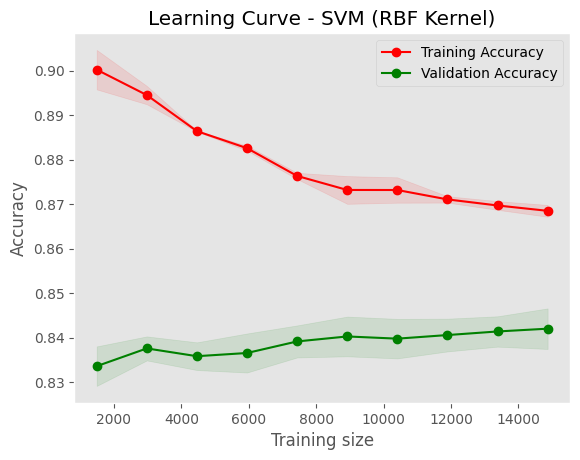

In [19]:
plot_learning_curves(X_train, y_train)

In [11]:
X_train

,Gender,Age,City,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness
23745,0,18.0,Bhopal,3.0,6.17,5.0,0,0,Class 12,0,5.0,1.0,0
27418,1,19.0,Agra,4.0,5.82,4.0,0,0,Class 12,1,7.0,4.0,0
4099,0,22.0,Varanasi,5.0,9.21,2.0,0,1,MSc,1,10.0,2.0,0
8247,0,34.0,Surat,2.0,5.68,4.0,3,1,B.Ed,1,0.0,1.0,0
20043,1,33.0,Kolkata,2.0,8.09,1.0,0,2,M.Com,0,5.0,3.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21575,0,25.0,Lucknow,3.0,6.75,5.0,0,0,BBA,0,5.0,2.0,1
5390,0,29.0,Kalyan,5.0,6.42,2.0,3,1,M.Com,1,4.0,4.0,1
860,0,18.0,Kolkata,5.0,6.37,3.0,0,1,Class 12,1,6.0,5.0,1
15795,1,34.0,Kanpur,3.0,9.11,4.0,0,1,M.Tech,0,8.0,4.0,1


In [26]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score

def optimize_xgboost(trial: optuna.Trial, X: pd.DataFrame, y: pd.Series) -> float:
    """
    Fonction pour optimiser un modèle XGBoost avec un pipeline scikit-learn
    utilisant une sélection de caractéristiques et IsolationForest.
    """

    X = X.copy()
    X = X.drop('City', axis=1)

    column_transformer = ColumnTransformer(
        transformers=[
            (
                'encoder',
                OneHotEncoder(drop='first', handle_unknown='ignore'),
                X.select_dtypes(include='object').columns,
            )
        ],
        remainder='passthrough',
        sparse_threshold=0
    )

    param_grid = {
        'model__n_estimators': trial.suggest_int('n_estimators', 100, 1000, step=50),
        'model__max_depth': trial.suggest_int('max_depth', 3, 15),
        'model__learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 0.3),
        'model__subsample': trial.suggest_float('subsample', 0.5, 1.0, step=0.1),
        'model__colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0, step=0.1),
        'model__gamma': trial.suggest_float('gamma', 0, 10),
        'model__reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-5, 1.0),
        'model__reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-5, 1.0),
        'transformer__encoder__min_frequency': trial.suggest_float('min_frequency', 0.01, 0.4),
    }

    scale_pos_weight = y.value_counts()[0] / y.value_counts()[1]

    pipeline = Pipeline(steps=[
        ('transformer', column_transformer),
        ('model', XGBClassifier(      
            objective='binary:logistic',
            eval_metric='logloss',
            scale_pos_weight=scale_pos_weight,
            random_state=42,
        ))
    ])

    pipeline.set_params(**param_grid)

    try:
        scores = cross_val_score(
            pipeline,
            X,
            y,
            cv=5,
            scoring='accuracy',
            n_jobs=-1
        )
    except Exception as e:
        print(f'Erreur pendant la validation croisée : {e}')
        return 0.0

    return scores.mean()



In [27]:
study = optuna.create_study(direction='maximize', study_name='XGBoost Optimization',
                            sampler=optuna.samplers.TPESampler(seed=42))

study.optimize(lambda trial: optimize_xgboost(trial, X_train, y_train), n_trials=100)                            

[I 2024-11-26 17:46:34,003] A new study created in memory with name: XGBoost Optimization
/opt/anaconda3/envs/backup/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/anaconda3/envs/backup/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/anaconda3/envs/backup/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/anaconda3/envs/backup/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will

In [30]:
xgboost_params = study.best_params
xgboost_score = study.best_value
print(xgboost_params)
print(xgboost_score)

{'n_estimators': 600, 'max_depth': 13, 'learning_rate': 0.00022745094720645436, 'subsample': 0.7, 'colsample_bytree': 0.5, 'gamma': 0.5566350039173886, 'reg_alpha': 1.1572068089409904e-05, 'reg_lambda': 0.022448492696921635, 'min_frequency': 0.3458349011854006}
0.846491817978032


In [36]:
def optimize_lightgbm(trial: optuna.Trial, X: pd.DataFrame, y: pd.Series) -> float:
    """
    Fonction pour optimiser un modèle LightGBM avec un pipeline scikit-learn
    utilisant une sélection de caractéristiques et IsolationForest.
    """

    X = X.copy()
    X = X.drop('City', axis=1)

    column_transformer = ColumnTransformer(
        transformers=[
            (
                'encoder',
                OneHotEncoder(drop='first', handle_unknown='ignore'),
                X.select_dtypes(include='object').columns,
            )
        ],
        remainder='passthrough',
        sparse_threshold=0
    )

    param_grid = {
        'model__n_estimators': trial.suggest_int('n_estimators', 100, 1000, step=50),
        'model__max_depth': trial.suggest_int('max_depth', 3, 15),
        'model__learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 0.3),
        'model__subsample': trial.suggest_float('subsample', 0.5, 1.0, step=0.1),
        'model__colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0, step=0.1),
        'model__gamma': trial.suggest_float('gamma', 0, 10),
        'model__reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-5, 1.0),
        'model__reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-5, 1.0),
        'transformer__encoder__min_frequency': trial.suggest_float('min_frequency', 0.01, 0.4),
    }

    pipeline = Pipeline(steps=[
        ('transformer', column_transformer),
        ('model', LGBMClassifier(      
            objective='binary',
            class_weight='balanced',
            random_state=42,
        ))
    ])

    pipeline.set_params(**param_grid)

    try:
        scores = cross_val_score(
            pipeline,
            X,
            y,
            cv=5,
            scoring='accuracy',
            n_jobs=-1
        )
    except Exception as e:
        print(f'Erreur pendant la validation croisée : {e}')
        return 0.0

    return scores.mean()

In [ ]:
study = optuna.create_study(direction='maximize', study_name='LightGBM Optimization',
                            sampler=optuna.samplers.TPESampler(seed=42))

study.optimize(lambda trial: optimize_lightgbm(trial, X_train, y_train), n_trials=100)

In [38]:
lightgbm_params = study.best_params
lightgbm_score = study.best_value
print(lightgbm_params)
print(lightgbm_score)

{'n_estimators': 450, 'max_depth': 13, 'learning_rate': 0.024255239169265967, 'subsample': 0.8, 'colsample_bytree': 0.5, 'gamma': 5.070017624835386, 'reg_alpha': 2.753263216660962e-05, 'reg_lambda': 0.0023808209814624556, 'min_frequency': 0.07573513126319933}
0.8447881640887693


In [15]:
from torch import nn
import torch
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import StandardScaler
import torch.nn.functional as F
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
import optuna
from tqdm.auto import tqdm

def preprocess_data(X: pd.DataFrame,
                    seed: float = 42) -> pd.DataFrame:

    np.random.seed(seed)
    X = X.copy()

    for col in X.columns:
        if X[col].nunique(dropna=True) == 2:
            unique_values = X[col].dropna().unique()
            mapping = {value: idx for idx, value in enumerate(unique_values)}
            X[col] = X[col].map(mapping)

    X['Sleep Duration'] = X['Sleep Duration'].apply(
        lambda value: (
            0 if value in ["Less than 5 hours", "2-3 hours", "3-4 hours", "4-5 hours", "No"]
            else 1 if value in ["5-6 hours", "6-7 hours", "4-6 hours"]
            else 2 if value in ["7-8 hours"]
            else 3 if value in ["8-9 hours", "More than 8 hours", "9-11 hours", "10-11 hours"]
            else np.random.choice([0, 1, 2, 3])
        )
    )

    X['Dietary Habits'] = X['Dietary Habits'].apply(
        lambda value: (
            0 if value in ["Unhealthy", "No Healthy", "No", "1", 1]
            else 1 if value in ["Moderate", "Less Healthy", "Less than Healthy", "2", 2]
            else 2 if value in ["Healthy", "More Healthy", "Yes", "3", 3]
            else np.random.choice([0, 1, 2])
        )
    )

    return X

df = pd.read_csv('student_not_split.csv')
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :-1], df.iloc[:, -1], test_size=0.2, random_state=42)

X_train = preprocess_data(X_train)
X_test = preprocess_data(X_test)

X_train_nnet = X_train.drop('City', axis=1)
X_test_nnet = X_test.drop('City', axis=1)

transformer_nnet = ColumnTransformer([
    ('encoder', OneHotEncoder(drop='first', handle_unknown='ignore', min_frequency=0.3), X_train_nnet.select_dtypes(include='object').columns),
    ('scaler', StandardScaler(), X_train_nnet.select_dtypes(include='number').columns),
], remainder='passthrough', sparse_threshold=0)

X_train_scaled = transformer_nnet.fit_transform(X_train_nnet)
X_test_scaled = transformer_nnet.transform(X_test_nnet)

/opt/anaconda3/envs/backup/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [21]:
class DepressionDataset(Dataset):
    def __init__(self, X, y):
        if isinstance(y, pd.Series):
            y = y.values
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.float32).view(-1, 1)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]
    
train_dataset = DepressionDataset(X_train_scaled, y_train)
test_dataset = DepressionDataset(X_test_scaled, y_test)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

class DepressionModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, n_hidden_layers, dropout):
        super(DepressionModel, self).__init__()
        self.l1 = nn.Linear(input_dim, hidden_dim)
        self.relu = nn.ReLU()
        self.hidden_layers = nn.ModuleList([nn.Sequential(
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
        ) for _ in range(n_hidden_layers)])
        self.l2 = nn.Linear(hidden_dim, output_dim)

        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        x = self.l1(x)
        x = self.relu(x)
        for hidden_layer in self.hidden_layers:
            x = hidden_layer(x)
        x = self.dropout(x)
        x = self.l2(x)
        return x
    

class FocalLoss(nn.Module):
    def __init__(self, alpha=1, gamma=2, logits=True, reduce=True):
        super(FocalLoss, self).__init__()
        self.alpha = alpha
        self.gamma = gamma
        self.logits = logits
        self.reduce = reduce

    def forward(self, inputs, targets):
        if self.logits:
            BCE_loss = F.binary_cross_entropy_with_logits(inputs, targets, reduce=None)
        else:
            BCE_loss = F.binary_cross_entropy(inputs, targets, reduce=None)
        pt = torch.exp(-BCE_loss)
        F_loss = self.alpha * (1-pt)**self.gamma * BCE_loss

        if self.reduce:
            return torch.mean(F_loss)
        else:
            return F_loss

In [22]:
model = DepressionModel(input_dim=X_train_scaled.shape[1], hidden_dim=64, output_dim=1, n_hidden_layers=2, dropout=0.5)
criterion = FocalLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

X_batch, y_batch = next(iter(train_loader))
y_pred = model(X_batch)
loss = criterion(y_pred, y_batch)
print(loss)
X_val_batch, y_val_batch = next(iter(test_loader))
y_val_pred = model(X_val_batch)
val_loss = criterion(y_val_pred, y_val_batch)
print(val_loss)

tensor(0.1784, grad_fn=<MeanBackward0>)
tensor(0.1767, grad_fn=<MeanBackward0>)


In [23]:
def optimize_nnet(trial, train_loader, test_loader):

    device = 'mps' if torch.backends.mps.is_available() else 'cuda' if torch.cuda.is_available() else 'cpu'

    input_dim = X_train_scaled.shape[1]
    hidden_dim = trial.suggest_int('hidden_dim', 32, 256, step=32)
    n_hidden_layers = trial.suggest_int('n_hidden_layers', 1, 5)
    dropout = trial.suggest_float('dropout', 0.1, 0.5)
    learning_rate = trial.suggest_float('learning_rate', 1e-4, 1e-2, log=True)
    alpha = trial.suggest_float('alpha', 0.25, 1.0)
    gamma = trial.suggest_int('gamma', 1, 5)
    weight_decay = trial.suggest_float('weight_decay', 1e-5, 1e-3, log=True)

    model = DepressionModel(input_dim, hidden_dim, 1, n_hidden_layers, dropout).to(device)
    criterion = FocalLoss(alpha=alpha, gamma=gamma)
    optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate, weight_decay=weight_decay)

    model.train()
    for _ in tqdm(range(10), desc='Training Neural Network'):  
        for X_batch, y_batch in train_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()

    model.eval()
    correct = 0
    total = 0
    with torch.inference_mode():
        for X_batch, y_batch in test_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            outputs = model(X_batch)
            predicted = (outputs > 0.5).float()
            total += y_batch.size(0)
            correct += (predicted == y_batch).sum().item()

    accuracy = correct / total
    return accuracy
    

In [24]:
study = optuna.create_study(direction='maximize', study_name='Neural Network Optimization',
                            sampler=optuna.samplers.TPESampler(seed=42))

study.optimize(lambda trial: optimize_nnet(trial, train_loader, test_loader), n_trials=100)

[I 2024-11-26 18:47:32,041] A new study created in memory with name: Neural Network Optimization


Training Neural Network:   0%|          | 0/10 [00:00<?, ?it/s]

[I 2024-11-26 18:48:02,998] Trial 0 finished with value: 0.8362919132149902 and parameters: {'hidden_dim': 96, 'n_hidden_layers': 5, 'dropout': 0.39279757672456206, 'learning_rate': 0.0015751320499779737, 'alpha': 0.3670139803318274, 'gamma': 1, 'weight_decay': 1.3066739238053272e-05}. Best is trial 0 with value: 0.8362919132149902.


Training Neural Network:   0%|          | 0/10 [00:00<?, ?it/s]

[I 2024-11-26 18:48:29,966] Trial 1 finished with value: 0.8298368298368298 and parameters: {'hidden_dim': 224, 'n_hidden_layers': 4, 'dropout': 0.3832290311184182, 'learning_rate': 0.00010994335574766199, 'alpha': 0.9774323891214958, 'gamma': 5, 'weight_decay': 2.6587543983272695e-05}. Best is trial 0 with value: 0.8362919132149902.


Training Neural Network:   0%|          | 0/10 [00:00<?, ?it/s]

[I 2024-11-26 18:48:47,202] Trial 2 finished with value: 0.835933297471759 and parameters: {'hidden_dim': 64, 'n_hidden_layers': 1, 'dropout': 0.2216968971838151, 'learning_rate': 0.0011207606211860567, 'alpha': 0.5739587639815869, 'gamma': 2, 'weight_decay': 0.00016738085788752134}. Best is trial 0 with value: 0.8362919132149902.


Training Neural Network:   0%|          | 0/10 [00:00<?, ?it/s]

[I 2024-11-26 18:49:07,134] Trial 3 finished with value: 0.8257127487896718 and parameters: {'hidden_dim': 64, 'n_hidden_layers': 2, 'dropout': 0.2465447373174767, 'learning_rate': 0.000816845589476017, 'alpha': 0.8388819710447601, 'gamma': 1, 'weight_decay': 0.00010677482709481354}. Best is trial 0 with value: 0.8362919132149902.


Training Neural Network:   0%|          | 0/10 [00:00<?, ?it/s]

[I 2024-11-26 18:49:24,608] Trial 4 finished with value: 0.8242782858167473 and parameters: {'hidden_dim': 160, 'n_hidden_layers': 1, 'dropout': 0.34301794076057535, 'learning_rate': 0.00021930485556643703, 'alpha': 0.29878869473895964, 'gamma': 5, 'weight_decay': 0.0008536189862866829}. Best is trial 0 with value: 0.8362919132149902.


Training Neural Network:   0%|          | 0/10 [00:00<?, ?it/s]

[I 2024-11-26 18:49:46,912] Trial 5 finished with value: 0.8336022951407567 and parameters: {'hidden_dim': 224, 'n_hidden_layers': 2, 'dropout': 0.13906884560255356, 'learning_rate': 0.0023359635026261607, 'alpha': 0.5801143703047009, 'gamma': 1, 'weight_decay': 9.7803370166594e-05}. Best is trial 0 with value: 0.8362919132149902.


Training Neural Network:   0%|          | 0/10 [00:00<?, ?it/s]

[I 2024-11-26 18:50:17,846] Trial 6 finished with value: 0.8323471400394478 and parameters: {'hidden_dim': 32, 'n_hidden_layers': 5, 'dropout': 0.20351199264000677, 'learning_rate': 0.0021137059440645744, 'alpha': 0.4837833070670582, 'gamma': 3, 'weight_decay': 0.00012399967836846095}. Best is trial 0 with value: 0.8362919132149902.


Training Neural Network:   0%|          | 0/10 [00:00<?, ?it/s]

[I 2024-11-26 18:50:47,584] Trial 7 finished with value: 0.8240989779451318 and parameters: {'hidden_dim': 64, 'n_hidden_layers': 5, 'dropout': 0.4100531293444458, 'learning_rate': 0.007568292060167618, 'alpha': 0.9211205128207366, 'gamma': 3, 'weight_decay': 0.0006978281265126031}. Best is trial 0 with value: 0.8362919132149902.


Training Neural Network:   0%|          | 0/10 [00:00<?, ?it/s]

[I 2024-11-26 18:51:04,738] Trial 8 finished with value: 0.8396987627756859 and parameters: {'hidden_dim': 32, 'n_hidden_layers': 1, 'dropout': 0.11809091556421523, 'learning_rate': 0.0004473636174621269, 'alpha': 0.5415079672671115, 'gamma': 2, 'weight_decay': 0.00045443839603360173}. Best is trial 8 with value: 0.8396987627756859.


Training Neural Network:   0%|          | 0/10 [00:00<?, ?it/s]

[I 2024-11-26 18:51:24,624] Trial 9 finished with value: 0.8391608391608392 and parameters: {'hidden_dim': 96, 'n_hidden_layers': 2, 'dropout': 0.31707843326329943, 'learning_rate': 0.00019135880487692312, 'alpha': 0.8516477355655298, 'gamma': 1, 'weight_decay': 0.0009413993046829941}. Best is trial 8 with value: 0.8396987627756859.


Training Neural Network:   0%|          | 0/10 [00:00<?, ?it/s]

[I 2024-11-26 18:51:48,548] Trial 10 finished with value: 0.8239196700735162 and parameters: {'hidden_dim': 160, 'n_hidden_layers': 3, 'dropout': 0.48781484431514643, 'learning_rate': 0.0004939713749567098, 'alpha': 0.7300663768506673, 'gamma': 4, 'weight_decay': 0.0002888908524619867}. Best is trial 8 with value: 0.8396987627756859.


Training Neural Network:   0%|          | 0/10 [00:00<?, ?it/s]

[I 2024-11-26 18:52:09,526] Trial 11 finished with value: 0.8361126053433746 and parameters: {'hidden_dim': 128, 'n_hidden_layers': 2, 'dropout': 0.10527069298533615, 'learning_rate': 0.00027264167240593264, 'alpha': 0.7310127475143509, 'gamma': 2, 'weight_decay': 0.0003806903967599258}. Best is trial 8 with value: 0.8396987627756859.


Training Neural Network:   0%|          | 0/10 [00:00<?, ?it/s]

[I 2024-11-26 18:52:26,611] Trial 12 finished with value: 0.8364712210866057 and parameters: {'hidden_dim': 32, 'n_hidden_layers': 1, 'dropout': 0.29121106928333834, 'learning_rate': 0.00010318516155615232, 'alpha': 0.742527443549847, 'gamma': 2, 'weight_decay': 0.00044587383238761983}. Best is trial 8 with value: 0.8396987627756859.


Training Neural Network:   0%|          | 0/10 [00:00<?, ?it/s]

[I 2024-11-26 18:52:50,185] Trial 13 finished with value: 0.8312712928097543 and parameters: {'hidden_dim': 96, 'n_hidden_layers': 3, 'dropout': 0.2984165248678858, 'learning_rate': 0.0003420748000009378, 'alpha': 0.451597470434506, 'gamma': 2, 'weight_decay': 0.0009818226878189125}. Best is trial 8 with value: 0.8396987627756859.


Training Neural Network:   0%|          | 0/10 [00:00<?, ?it/s]

[I 2024-11-26 18:53:10,031] Trial 14 finished with value: 0.8432849202079972 and parameters: {'hidden_dim': 96, 'n_hidden_layers': 2, 'dropout': 0.1507939376004347, 'learning_rate': 0.00018089224154177916, 'alpha': 0.6402911824165997, 'gamma': 1, 'weight_decay': 4.4232750160705384e-05}. Best is trial 14 with value: 0.8432849202079972.


Training Neural Network:   0%|          | 0/10 [00:00<?, ?it/s]

[I 2024-11-26 18:53:27,078] Trial 15 finished with value: 0.8384436076743769 and parameters: {'hidden_dim': 32, 'n_hidden_layers': 1, 'dropout': 0.155701130673422, 'learning_rate': 0.000576322908179081, 'alpha': 0.6625753525745551, 'gamma': 2, 'weight_decay': 4.4526373085488156e-05}. Best is trial 14 with value: 0.8432849202079972.


Training Neural Network:   0%|          | 0/10 [00:00<?, ?it/s]

[I 2024-11-26 18:53:47,940] Trial 16 finished with value: 0.835933297471759 and parameters: {'hidden_dim': 128, 'n_hidden_layers': 2, 'dropout': 0.17931755485186668, 'learning_rate': 0.004326977485338142, 'alpha': 0.43412018239397593, 'gamma': 4, 'weight_decay': 4.528274347601408e-05}. Best is trial 14 with value: 0.8432849202079972.


Training Neural Network:   0%|          | 0/10 [00:00<?, ?it/s]

[I 2024-11-26 18:54:12,308] Trial 17 finished with value: 0.8332436793975255 and parameters: {'hidden_dim': 192, 'n_hidden_layers': 3, 'dropout': 0.1292446425188274, 'learning_rate': 0.00015655976343953294, 'alpha': 0.5435792309593224, 'gamma': 1, 'weight_decay': 5.289031859423953e-05}. Best is trial 14 with value: 0.8432849202079972.


Training Neural Network:   0%|          | 0/10 [00:00<?, ?it/s]

[I 2024-11-26 18:54:30,028] Trial 18 finished with value: 0.8316299085529855 and parameters: {'hidden_dim': 256, 'n_hidden_layers': 1, 'dropout': 0.10176036698802941, 'learning_rate': 0.00048120291999696426, 'alpha': 0.653424615069068, 'gamma': 3, 'weight_decay': 1.0625721497327473e-05}. Best is trial 14 with value: 0.8432849202079972.


Training Neural Network:   0%|          | 0/10 [00:00<?, ?it/s]

[I 2024-11-26 18:54:53,443] Trial 19 finished with value: 0.8414918414918415 and parameters: {'hidden_dim': 64, 'n_hidden_layers': 3, 'dropout': 0.24609599022898077, 'learning_rate': 0.0003644241569268703, 'alpha': 0.515226586185423, 'gamma': 2, 'weight_decay': 2.162316266519429e-05}. Best is trial 14 with value: 0.8432849202079972.


Training Neural Network:   0%|          | 0/10 [00:00<?, ?it/s]

[I 2024-11-26 18:55:21,047] Trial 20 finished with value: 0.8197955890263583 and parameters: {'hidden_dim': 128, 'n_hidden_layers': 4, 'dropout': 0.2705386664376376, 'learning_rate': 0.0008207112561671239, 'alpha': 0.35342643992274725, 'gamma': 4, 'weight_decay': 1.935889978386814e-05}. Best is trial 14 with value: 0.8432849202079972.


Training Neural Network:   0%|          | 0/10 [00:00<?, ?it/s]

[I 2024-11-26 18:55:44,986] Trial 21 finished with value: 0.8375470683162991 and parameters: {'hidden_dim': 64, 'n_hidden_layers': 3, 'dropout': 0.19166223450238554, 'learning_rate': 0.00034677499433992035, 'alpha': 0.5049667931098416, 'gamma': 2, 'weight_decay': 2.7969613569489473e-05}. Best is trial 14 with value: 0.8432849202079972.


Training Neural Network:   0%|          | 0/10 [00:00<?, ?it/s]

[I 2024-11-26 18:56:10,712] Trial 22 finished with value: 0.8386229155459924 and parameters: {'hidden_dim': 96, 'n_hidden_layers': 4, 'dropout': 0.23353863552213278, 'learning_rate': 0.0001608979690988365, 'alpha': 0.6180171685475409, 'gamma': 3, 'weight_decay': 7.731789801741319e-05}. Best is trial 14 with value: 0.8432849202079972.


Training Neural Network:   0%|          | 0/10 [00:00<?, ?it/s]

[I 2024-11-26 18:56:30,676] Trial 23 finished with value: 0.8361126053433746 and parameters: {'hidden_dim': 32, 'n_hidden_layers': 2, 'dropout': 0.16074787439322547, 'learning_rate': 0.00034925737649718077, 'alpha': 0.39301450039373165, 'gamma': 2, 'weight_decay': 1.8792650372360238e-05}. Best is trial 14 with value: 0.8432849202079972.


Training Neural Network:   0%|          | 0/10 [00:00<?, ?it/s]

[I 2024-11-26 18:56:54,022] Trial 24 finished with value: 0.8422090729783037 and parameters: {'hidden_dim': 64, 'n_hidden_layers': 3, 'dropout': 0.1828989607275351, 'learning_rate': 0.0006145664740818148, 'alpha': 0.5288164107125667, 'gamma': 1, 'weight_decay': 0.00017654491488114545}. Best is trial 14 with value: 0.8432849202079972.


Training Neural Network:   0%|          | 0/10 [00:00<?, ?it/s]

[I 2024-11-26 18:57:17,747] Trial 25 finished with value: 0.8361126053433746 and parameters: {'hidden_dim': 64, 'n_hidden_layers': 3, 'dropout': 0.18524357962446847, 'learning_rate': 0.0007321350851217542, 'alpha': 0.6726784525878897, 'gamma': 1, 'weight_decay': 0.00018599354912265657}. Best is trial 14 with value: 0.8432849202079972.


Training Neural Network:   0%|          | 0/10 [00:00<?, ?it/s]

[I 2024-11-26 18:57:43,439] Trial 26 finished with value: 0.8332436793975255 and parameters: {'hidden_dim': 96, 'n_hidden_layers': 4, 'dropout': 0.261391644398265, 'learning_rate': 0.00024728435029728983, 'alpha': 0.6040232718889874, 'gamma': 1, 'weight_decay': 6.608583283526065e-05}. Best is trial 14 with value: 0.8432849202079972.


Training Neural Network:   0%|          | 0/10 [00:00<?, ?it/s]

[I 2024-11-26 18:58:06,847] Trial 27 finished with value: 0.8366505289582212 and parameters: {'hidden_dim': 64, 'n_hidden_layers': 3, 'dropout': 0.23210995340406132, 'learning_rate': 0.0013550476206275349, 'alpha': 0.26336703334024525, 'gamma': 1, 'weight_decay': 3.069163489302656e-05}. Best is trial 14 with value: 0.8432849202079972.


Training Neural Network:   0%|          | 0/10 [00:00<?, ?it/s]

[I 2024-11-26 18:58:30,744] Trial 28 finished with value: 0.8416711493634571 and parameters: {'hidden_dim': 128, 'n_hidden_layers': 3, 'dropout': 0.20886388568585898, 'learning_rate': 0.0001395486225099356, 'alpha': 0.5190542689218156, 'gamma': 1, 'weight_decay': 0.00021411738056094807}. Best is trial 14 with value: 0.8432849202079972.


Training Neural Network:   0%|          | 0/10 [00:00<?, ?it/s]

[I 2024-11-26 18:58:58,063] Trial 29 finished with value: 0.8325264479110633 and parameters: {'hidden_dim': 160, 'n_hidden_layers': 4, 'dropout': 0.15163941101472236, 'learning_rate': 0.0001413623905575456, 'alpha': 0.37032101596240496, 'gamma': 1, 'weight_decay': 0.00023732548144254223}. Best is trial 14 with value: 0.8432849202079972.


Training Neural Network:   0%|          | 0/10 [00:00<?, ?it/s]

[I 2024-11-26 18:59:18,532] Trial 30 finished with value: 0.8395194549040703 and parameters: {'hidden_dim': 128, 'n_hidden_layers': 2, 'dropout': 0.21300551901158726, 'learning_rate': 0.000125618708696441, 'alpha': 0.7856361607845146, 'gamma': 1, 'weight_decay': 0.00015110679793700908}. Best is trial 14 with value: 0.8432849202079972.


Training Neural Network:   0%|          | 0/10 [00:00<?, ?it/s]

[I 2024-11-26 18:59:42,613] Trial 31 finished with value: 0.8352160659852967 and parameters: {'hidden_dim': 96, 'n_hidden_layers': 3, 'dropout': 0.17509012108892963, 'learning_rate': 0.00029380280873415095, 'alpha': 0.5156467518255656, 'gamma': 1, 'weight_decay': 1.62763753902408e-05}. Best is trial 14 with value: 0.8432849202079972.


Training Neural Network:   0%|          | 0/10 [00:00<?, ?it/s]

[I 2024-11-26 19:00:06,459] Trial 32 finished with value: 0.8431056123363816 and parameters: {'hidden_dim': 96, 'n_hidden_layers': 3, 'dropout': 0.2572703299051813, 'learning_rate': 0.0002046792536194387, 'alpha': 0.4644694072880541, 'gamma': 1, 'weight_decay': 0.0002320942509420826}. Best is trial 14 with value: 0.8432849202079972.


Training Neural Network:   0%|          | 0/10 [00:00<?, ?it/s]

[I 2024-11-26 19:00:30,272] Trial 33 finished with value: 0.8309126770665233 and parameters: {'hidden_dim': 96, 'n_hidden_layers': 3, 'dropout': 0.2024495060730429, 'learning_rate': 0.00019088039305506824, 'alpha': 0.4436713014142572, 'gamma': 1, 'weight_decay': 0.00023603590624698224}. Best is trial 14 with value: 0.8432849202079972.


Training Neural Network:   0%|          | 0/10 [00:00<?, ?it/s]

[I 2024-11-26 19:00:57,536] Trial 34 finished with value: 0.8303747534516766 and parameters: {'hidden_dim': 128, 'n_hidden_layers': 4, 'dropout': 0.2708995549186879, 'learning_rate': 0.00010151167395026777, 'alpha': 0.5672060783017819, 'gamma': 1, 'weight_decay': 0.00031219383485299966}. Best is trial 14 with value: 0.8432849202079972.


Training Neural Network:   0%|          | 0/10 [00:00<?, ?it/s]

[I 2024-11-26 19:01:18,537] Trial 35 finished with value: 0.8375470683162991 and parameters: {'hidden_dim': 192, 'n_hidden_layers': 2, 'dropout': 0.3384999927357975, 'learning_rate': 0.00021185844009350048, 'alpha': 0.40186433085365036, 'gamma': 1, 'weight_decay': 0.00018319373543149503}. Best is trial 14 with value: 0.8432849202079972.


Training Neural Network:   0%|          | 0/10 [00:00<?, ?it/s]

[I 2024-11-26 19:01:42,125] Trial 36 finished with value: 0.835933297471759 and parameters: {'hidden_dim': 96, 'n_hidden_layers': 3, 'dropout': 0.2140602574059099, 'learning_rate': 0.00014545693387097236, 'alpha': 0.3277641752457654, 'gamma': 1, 'weight_decay': 0.00012013558542504305}. Best is trial 14 with value: 0.8432849202079972.


Training Neural Network:   0%|          | 0/10 [00:00<?, ?it/s]

[I 2024-11-26 19:02:08,953] Trial 37 finished with value: 0.8414918414918415 and parameters: {'hidden_dim': 128, 'n_hidden_layers': 4, 'dropout': 0.13965382988535932, 'learning_rate': 0.0018073979643458663, 'alpha': 0.45392745614665264, 'gamma': 5, 'weight_decay': 8.400022418519055e-05}. Best is trial 14 with value: 0.8432849202079972.


Training Neural Network:   0%|          | 0/10 [00:00<?, ?it/s]

[I 2024-11-26 19:02:29,881] Trial 38 finished with value: 0.8305540613232921 and parameters: {'hidden_dim': 160, 'n_hidden_layers': 2, 'dropout': 0.16691872935863375, 'learning_rate': 0.0006334779301695644, 'alpha': 0.5846367284065596, 'gamma': 2, 'weight_decay': 0.0006468194425646703}. Best is trial 14 with value: 0.8432849202079972.


Training Neural Network:   0%|          | 0/10 [00:00<?, ?it/s]

[I 2024-11-26 19:02:53,330] Trial 39 finished with value: 0.83467814237045 and parameters: {'hidden_dim': 64, 'n_hidden_layers': 3, 'dropout': 0.3853655486676324, 'learning_rate': 0.00018379587543496643, 'alpha': 0.4863161572078623, 'gamma': 1, 'weight_decay': 0.00013316890344551336}. Best is trial 14 with value: 0.8432849202079972.


Training Neural Network:   0%|          | 0/10 [00:00<?, ?it/s]

[I 2024-11-26 19:03:13,248] Trial 40 finished with value: 0.8334229872691411 and parameters: {'hidden_dim': 96, 'n_hidden_layers': 2, 'dropout': 0.24170674803029624, 'learning_rate': 0.0010669939783370436, 'alpha': 0.6360367135619103, 'gamma': 2, 'weight_decay': 0.00021168818774126939}. Best is trial 14 with value: 0.8432849202079972.


Training Neural Network:   0%|          | 0/10 [00:00<?, ?it/s]

[I 2024-11-26 19:03:36,581] Trial 41 finished with value: 0.8384436076743769 and parameters: {'hidden_dim': 64, 'n_hidden_layers': 3, 'dropout': 0.258894119308404, 'learning_rate': 0.00040173783027908235, 'alpha': 0.538424083496919, 'gamma': 1, 'weight_decay': 2.3733416217395813e-05}. Best is trial 14 with value: 0.8432849202079972.


Training Neural Network:   0%|          | 0/10 [00:00<?, ?it/s]

[I 2024-11-26 19:03:59,859] Trial 42 finished with value: 0.8362919132149902 and parameters: {'hidden_dim': 64, 'n_hidden_layers': 3, 'dropout': 0.22505589825221384, 'learning_rate': 0.0002514768396552026, 'alpha': 0.6898540007363856, 'gamma': 2, 'weight_decay': 3.6954030712889784e-05}. Best is trial 14 with value: 0.8432849202079972.


Training Neural Network:   0%|          | 0/10 [00:00<?, ?it/s]

[I 2024-11-26 19:04:23,350] Trial 43 finished with value: 0.835933297471759 and parameters: {'hidden_dim': 64, 'n_hidden_layers': 3, 'dropout': 0.28909903720892655, 'learning_rate': 0.0003128306600273281, 'alpha': 0.5044911020968893, 'gamma': 1, 'weight_decay': 0.0003245099626532685}. Best is trial 14 with value: 0.8432849202079972.


Training Neural Network:   0%|          | 0/10 [00:00<?, ?it/s]

[I 2024-11-26 19:04:48,845] Trial 44 finished with value: 0.8379056840595303 and parameters: {'hidden_dim': 96, 'n_hidden_layers': 4, 'dropout': 0.2478719752921873, 'learning_rate': 0.00021520954112222969, 'alpha': 0.9989806994194648, 'gamma': 1, 'weight_decay': 9.343122935390058e-05}. Best is trial 14 with value: 0.8432849202079972.


Training Neural Network:   0%|          | 0/10 [00:00<?, ?it/s]

[I 2024-11-26 19:05:18,961] Trial 45 finished with value: 0.8353953738569123 and parameters: {'hidden_dim': 32, 'n_hidden_layers': 5, 'dropout': 0.20323660902879492, 'learning_rate': 0.00012530511286604903, 'alpha': 0.5469152973788106, 'gamma': 2, 'weight_decay': 6.293601077076973e-05}. Best is trial 14 with value: 0.8432849202079972.


Training Neural Network:   0%|          | 0/10 [00:00<?, ?it/s]

[I 2024-11-26 19:05:39,858] Trial 46 finished with value: 0.8366505289582212 and parameters: {'hidden_dim': 128, 'n_hidden_layers': 2, 'dropout': 0.32223406697990353, 'learning_rate': 0.00039597298330124227, 'alpha': 0.4767709838121434, 'gamma': 1, 'weight_decay': 0.0005917216576685429}. Best is trial 14 with value: 0.8432849202079972.


Training Neural Network:   0%|          | 0/10 [00:00<?, ?it/s]

[I 2024-11-26 19:06:03,577] Trial 47 finished with value: 0.8366505289582212 and parameters: {'hidden_dim': 64, 'n_hidden_layers': 3, 'dropout': 0.11964997040109832, 'learning_rate': 0.0005870885735136083, 'alpha': 0.6035524133111009, 'gamma': 2, 'weight_decay': 1.3950702288399334e-05}. Best is trial 14 with value: 0.8432849202079972.


Training Neural Network:   0%|          | 0/10 [00:00<?, ?it/s]

[I 2024-11-26 19:06:27,709] Trial 48 finished with value: 0.8334229872691411 and parameters: {'hidden_dim': 96, 'n_hidden_layers': 3, 'dropout': 0.4522975838355018, 'learning_rate': 0.0002523293647143359, 'alpha': 0.41389436683384784, 'gamma': 2, 'weight_decay': 0.00015122472524344612}. Best is trial 14 with value: 0.8432849202079972.


Training Neural Network:   0%|          | 0/10 [00:00<?, ?it/s]

[I 2024-11-26 19:06:48,584] Trial 49 finished with value: 0.8373677604446835 and parameters: {'hidden_dim': 160, 'n_hidden_layers': 2, 'dropout': 0.36721135007229155, 'learning_rate': 0.00012340499234228595, 'alpha': 0.7080735185482466, 'gamma': 3, 'weight_decay': 0.00010954474534478611}. Best is trial 14 with value: 0.8432849202079972.


Training Neural Network:   0%|          | 0/10 [00:00<?, ?it/s]

[I 2024-11-26 19:07:12,295] Trial 50 finished with value: 0.8353953738569123 and parameters: {'hidden_dim': 32, 'n_hidden_layers': 3, 'dropout': 0.2830564877728585, 'learning_rate': 0.0008205216908793389, 'alpha': 0.5190733984436456, 'gamma': 1, 'weight_decay': 0.0004130288333496426}. Best is trial 14 with value: 0.8432849202079972.


Training Neural Network:   0%|          | 0/10 [00:00<?, ?it/s]

[I 2024-11-26 19:07:42,644] Trial 51 finished with value: 0.8400573785189169 and parameters: {'hidden_dim': 128, 'n_hidden_layers': 5, 'dropout': 0.15053412813368333, 'learning_rate': 0.0020254084845022905, 'alpha': 0.43204919664444624, 'gamma': 5, 'weight_decay': 8.613985450966562e-05}. Best is trial 14 with value: 0.8432849202079972.


Training Neural Network:   0%|          | 0/10 [00:00<?, ?it/s]

[I 2024-11-26 19:08:09,832] Trial 52 finished with value: 0.8267885960193653 and parameters: {'hidden_dim': 128, 'n_hidden_layers': 4, 'dropout': 0.14143788679548905, 'learning_rate': 0.003314008613255674, 'alpha': 0.4682848280181134, 'gamma': 5, 'weight_decay': 3.63713221480915e-05}. Best is trial 14 with value: 0.8432849202079972.


Training Neural Network:   0%|          | 0/10 [00:00<?, ?it/s]

[I 2024-11-26 19:08:35,676] Trial 53 finished with value: 0.8407746100053792 and parameters: {'hidden_dim': 96, 'n_hidden_layers': 4, 'dropout': 0.1296543853928581, 'learning_rate': 0.0017855429923244186, 'alpha': 0.5691384881970144, 'gamma': 4, 'weight_decay': 5.186163115148095e-05}. Best is trial 14 with value: 0.8432849202079972.


Training Neural Network:   0%|          | 0/10 [00:00<?, ?it/s]

[I 2024-11-26 19:09:02,830] Trial 54 finished with value: 0.8309126770665233 and parameters: {'hidden_dim': 128, 'n_hidden_layers': 4, 'dropout': 0.19015963877160597, 'learning_rate': 0.0027839492615623707, 'alpha': 0.4589286772901589, 'gamma': 3, 'weight_decay': 0.0002749886660696862}. Best is trial 14 with value: 0.8432849202079972.


Training Neural Network:   0%|          | 0/10 [00:00<?, ?it/s]

[I 2024-11-26 19:09:33,752] Trial 55 finished with value: 0.8425676887215349 and parameters: {'hidden_dim': 192, 'n_hidden_layers': 5, 'dropout': 0.16549053049774282, 'learning_rate': 0.0012870838731382833, 'alpha': 0.4902791039643309, 'gamma': 4, 'weight_decay': 7.605775309112247e-05}. Best is trial 14 with value: 0.8432849202079972.


Training Neural Network:   0%|          | 0/10 [00:00<?, ?it/s]

[I 2024-11-26 19:10:04,881] Trial 56 finished with value: 0.8271472117625964 and parameters: {'hidden_dim': 224, 'n_hidden_layers': 5, 'dropout': 0.1788720316531453, 'learning_rate': 0.0011598832116960782, 'alpha': 0.5359824139308882, 'gamma': 4, 'weight_decay': 0.00014512015529333778}. Best is trial 14 with value: 0.8432849202079972.


Training Neural Network:   0%|          | 0/10 [00:00<?, ?it/s]

[I 2024-11-26 19:10:22,659] Trial 57 finished with value: 0.8323471400394478 and parameters: {'hidden_dim': 192, 'n_hidden_layers': 1, 'dropout': 0.19837368921350773, 'learning_rate': 0.0013084772398732829, 'alpha': 0.6415394269962119, 'gamma': 3, 'weight_decay': 2.349846641153305e-05}. Best is trial 14 with value: 0.8432849202079972.


Training Neural Network:   0%|          | 0/10 [00:00<?, ?it/s]

[I 2024-11-26 19:10:47,214] Trial 58 finished with value: 0.8292989062219831 and parameters: {'hidden_dim': 256, 'n_hidden_layers': 3, 'dropout': 0.16661869196536505, 'learning_rate': 0.0009414408706364471, 'alpha': 0.49495975204982495, 'gamma': 2, 'weight_decay': 6.855341394836493e-05}. Best is trial 14 with value: 0.8432849202079972.


Training Neural Network:   0%|          | 0/10 [00:00<?, ?it/s]

[I 2024-11-26 19:11:08,544] Trial 59 finished with value: 0.8370091447014524 and parameters: {'hidden_dim': 224, 'n_hidden_layers': 2, 'dropout': 0.21794424805336785, 'learning_rate': 0.0001745509999169043, 'alpha': 0.37706663956414954, 'gamma': 1, 'weight_decay': 0.00020491521131152157}. Best is trial 14 with value: 0.8432849202079972.


Training Neural Network:   0%|          | 0/10 [00:00<?, ?it/s]

[I 2024-11-26 19:11:32,778] Trial 60 finished with value: 0.8201542047695893 and parameters: {'hidden_dim': 192, 'n_hidden_layers': 3, 'dropout': 0.24808541659485073, 'learning_rate': 0.007969304503538022, 'alpha': 0.5890741474721943, 'gamma': 4, 'weight_decay': 0.00010184015961332996}. Best is trial 14 with value: 0.8432849202079972.


Training Neural Network:   0%|          | 0/10 [00:00<?, ?it/s]

[I 2024-11-26 19:12:03,266] Trial 61 finished with value: 0.8230231307154384 and parameters: {'hidden_dim': 160, 'n_hidden_layers': 5, 'dropout': 0.13910069165131306, 'learning_rate': 0.0016167701725696663, 'alpha': 0.4267699315181551, 'gamma': 5, 'weight_decay': 8.486788524986928e-05}. Best is trial 14 with value: 0.8432849202079972.


Training Neural Network:   0%|          | 0/10 [00:00<?, ?it/s]

[I 2024-11-26 19:12:30,445] Trial 62 finished with value: 0.8228438228438228 and parameters: {'hidden_dim': 128, 'n_hidden_layers': 4, 'dropout': 0.1120896926094006, 'learning_rate': 0.0005026509105814512, 'alpha': 0.4605376526015382, 'gamma': 4, 'weight_decay': 5.588883287134859e-05}. Best is trial 14 with value: 0.8432849202079972.


Training Neural Network:   0%|          | 0/10 [00:00<?, ?it/s]

[I 2024-11-26 19:13:00,655] Trial 63 finished with value: 0.8251748251748252 and parameters: {'hidden_dim': 96, 'n_hidden_layers': 5, 'dropout': 0.15605826477779142, 'learning_rate': 0.0024555576801618783, 'alpha': 0.9061950333224107, 'gamma': 5, 'weight_decay': 4.2840980215250436e-05}. Best is trial 14 with value: 0.8432849202079972.


Training Neural Network:   0%|          | 0/10 [00:00<?, ?it/s]

[I 2024-11-26 19:13:24,992] Trial 64 finished with value: 0.8350367581136812 and parameters: {'hidden_dim': 160, 'n_hidden_layers': 3, 'dropout': 0.13022276514760256, 'learning_rate': 0.0007035111913995018, 'alpha': 0.522040418916762, 'gamma': 5, 'weight_decay': 0.0002556576188524846}. Best is trial 14 with value: 0.8432849202079972.


Training Neural Network:   0%|          | 0/10 [00:00<?, ?it/s]

[I 2024-11-26 19:13:50,663] Trial 65 finished with value: 0.8353953738569123 and parameters: {'hidden_dim': 64, 'n_hidden_layers': 4, 'dropout': 0.1705430134068034, 'learning_rate': 0.0013551156879662602, 'alpha': 0.5589059631139384, 'gamma': 3, 'weight_decay': 0.0003377330306043148}. Best is trial 14 with value: 0.8432849202079972.


Training Neural Network:   0%|          | 0/10 [00:00<?, ?it/s]

[I 2024-11-26 19:14:20,885] Trial 66 finished with value: 0.8465124618970773 and parameters: {'hidden_dim': 96, 'n_hidden_layers': 5, 'dropout': 0.18549073351787976, 'learning_rate': 0.003889139338065849, 'alpha': 0.3438955111603742, 'gamma': 1, 'weight_decay': 0.00017097397344791103}. Best is trial 66 with value: 0.8465124618970773.


Training Neural Network:   0%|          | 0/10 [00:00<?, ?it/s]

[I 2024-11-26 19:14:51,101] Trial 67 finished with value: 0.8418504572350726 and parameters: {'hidden_dim': 96, 'n_hidden_layers': 5, 'dropout': 0.22857024906373147, 'learning_rate': 0.005900697537188916, 'alpha': 0.32636413832060046, 'gamma': 1, 'weight_decay': 0.00017262610562247233}. Best is trial 66 with value: 0.8465124618970773.


Training Neural Network:   0%|          | 0/10 [00:00<?, ?it/s]

[I 2024-11-26 19:15:21,260] Trial 68 finished with value: 0.8266092881477497 and parameters: {'hidden_dim': 96, 'n_hidden_layers': 5, 'dropout': 0.22659028638337822, 'learning_rate': 0.006474404496673679, 'alpha': 0.25462744842546114, 'gamma': 1, 'weight_decay': 0.00017055170806911076}. Best is trial 66 with value: 0.8465124618970773.


Training Neural Network:   0%|          | 0/10 [00:00<?, ?it/s]

[I 2024-11-26 19:15:51,499] Trial 69 finished with value: 0.8344988344988346 and parameters: {'hidden_dim': 96, 'n_hidden_layers': 5, 'dropout': 0.18940456834525993, 'learning_rate': 0.005021436366624511, 'alpha': 0.30423431914053667, 'gamma': 1, 'weight_decay': 0.00021073297101562965}. Best is trial 66 with value: 0.8465124618970773.


Training Neural Network:   0%|          | 0/10 [00:00<?, ?it/s]

[I 2024-11-26 19:16:21,654] Trial 70 finished with value: 0.8364712210866057 and parameters: {'hidden_dim': 96, 'n_hidden_layers': 5, 'dropout': 0.20549708775576775, 'learning_rate': 0.009669606861757423, 'alpha': 0.32656224820350843, 'gamma': 1, 'weight_decay': 0.00011498172432684547}. Best is trial 66 with value: 0.8465124618970773.


Training Neural Network:   0%|          | 0/10 [00:00<?, ?it/s]

[I 2024-11-26 19:16:51,697] Trial 71 finished with value: 0.8466917697686929 and parameters: {'hidden_dim': 64, 'n_hidden_layers': 5, 'dropout': 0.23410088880715016, 'learning_rate': 0.004814268106101101, 'alpha': 0.2750137348085381, 'gamma': 1, 'weight_decay': 1.0075646905269696e-05}. Best is trial 71 with value: 0.8466917697686929.


Training Neural Network:   0%|          | 0/10 [00:00<?, ?it/s]

[I 2024-11-26 19:17:21,717] Trial 72 finished with value: 0.8296575219652143 and parameters: {'hidden_dim': 64, 'n_hidden_layers': 5, 'dropout': 0.26137882406085056, 'learning_rate': 0.004929767048044166, 'alpha': 0.2879639382025995, 'gamma': 1, 'weight_decay': 0.00016803451074655238}. Best is trial 71 with value: 0.8466917697686929.


Training Neural Network:   0%|          | 0/10 [00:00<?, ?it/s]

[I 2024-11-26 19:17:51,774] Trial 73 finished with value: 0.8357539896001435 and parameters: {'hidden_dim': 32, 'n_hidden_layers': 5, 'dropout': 0.23439925453110866, 'learning_rate': 0.005783376346094014, 'alpha': 0.27781262910665, 'gamma': 1, 'weight_decay': 0.00012969507240271182}. Best is trial 71 with value: 0.8466917697686929.


Training Neural Network:   0%|          | 0/10 [00:00<?, ?it/s]

[I 2024-11-26 19:18:22,168] Trial 74 finished with value: 0.8368298368298368 and parameters: {'hidden_dim': 96, 'n_hidden_layers': 5, 'dropout': 0.18091248863339582, 'learning_rate': 0.0036823581238774983, 'alpha': 0.3540438481249586, 'gamma': 1, 'weight_decay': 1.0135714349868528e-05}. Best is trial 71 with value: 0.8466917697686929.


Training Neural Network:   0%|          | 0/10 [00:00<?, ?it/s]

[I 2024-11-26 19:18:52,156] Trial 75 finished with value: 0.831809216424601 and parameters: {'hidden_dim': 64, 'n_hidden_layers': 5, 'dropout': 0.30727371017566696, 'learning_rate': 0.003834250129427185, 'alpha': 0.32355235494984524, 'gamma': 1, 'weight_decay': 0.0002417853274083985}. Best is trial 71 with value: 0.8466917697686929.


Training Neural Network:   0%|          | 0/10 [00:00<?, ?it/s]

[I 2024-11-26 19:19:22,081] Trial 76 finished with value: 0.8362919132149902 and parameters: {'hidden_dim': 64, 'n_hidden_layers': 5, 'dropout': 0.2131068311263818, 'learning_rate': 0.006772352096310258, 'alpha': 0.3918687914891046, 'gamma': 1, 'weight_decay': 0.0004899357415003075}. Best is trial 71 with value: 0.8466917697686929.


Training Neural Network:   0%|          | 0/10 [00:00<?, ?it/s]

[I 2024-11-26 19:19:52,322] Trial 77 finished with value: 0.8341402187556034 and parameters: {'hidden_dim': 96, 'n_hidden_layers': 5, 'dropout': 0.2730848084585532, 'learning_rate': 0.002992251692935404, 'alpha': 0.30831329970115134, 'gamma': 1, 'weight_decay': 0.00018991943678976138}. Best is trial 71 with value: 0.8466917697686929.


Training Neural Network:   0%|          | 0/10 [00:00<?, ?it/s]

[I 2024-11-26 19:20:10,148] Trial 78 finished with value: 0.8328850636542944 and parameters: {'hidden_dim': 224, 'n_hidden_layers': 1, 'dropout': 0.19574722047018453, 'learning_rate': 0.004275407771299943, 'alpha': 0.3485437461761459, 'gamma': 1, 'weight_decay': 0.0003601002761432}. Best is trial 71 with value: 0.8466917697686929.


Training Neural Network:   0%|          | 0/10 [00:00<?, ?it/s]

[I 2024-11-26 19:20:40,509] Trial 79 finished with value: 0.8158508158508159 and parameters: {'hidden_dim': 96, 'n_hidden_layers': 5, 'dropout': 0.21118197237424993, 'learning_rate': 0.00841355193077002, 'alpha': 0.6202252798975529, 'gamma': 1, 'weight_decay': 0.00014625063136029516}. Best is trial 71 with value: 0.8466917697686929.


Training Neural Network:   0%|          | 0/10 [00:00<?, ?it/s]

[I 2024-11-26 19:21:10,583] Trial 80 finished with value: 0.8344988344988346 and parameters: {'hidden_dim': 128, 'n_hidden_layers': 5, 'dropout': 0.23637282279298585, 'learning_rate': 0.00015907084758734477, 'alpha': 0.4130824916961681, 'gamma': 1, 'weight_decay': 0.00027292539775160366}. Best is trial 71 with value: 0.8466917697686929.


Training Neural Network:   0%|          | 0/10 [00:00<?, ?it/s]

[I 2024-11-26 19:21:34,326] Trial 81 finished with value: 0.8423883808499193 and parameters: {'hidden_dim': 64, 'n_hidden_layers': 3, 'dropout': 0.24786357397586617, 'learning_rate': 0.005522296372955065, 'alpha': 0.2753581298617603, 'gamma': 1, 'weight_decay': 1.832082112600246e-05}. Best is trial 71 with value: 0.8466917697686929.


Training Neural Network:   0%|          | 0/10 [00:00<?, ?it/s]

[I 2024-11-26 19:21:58,025] Trial 82 finished with value: 0.8278644432490586 and parameters: {'hidden_dim': 64, 'n_hidden_layers': 3, 'dropout': 0.2505106864556078, 'learning_rate': 0.005437294493124605, 'alpha': 0.278066333931194, 'gamma': 1, 'weight_decay': 3.107284164091036e-05}. Best is trial 71 with value: 0.8466917697686929.


Training Neural Network:   0%|          | 0/10 [00:00<?, ?it/s]

[I 2024-11-26 19:22:21,684] Trial 83 finished with value: 0.845795230410615 and parameters: {'hidden_dim': 32, 'n_hidden_layers': 3, 'dropout': 0.16456599779341735, 'learning_rate': 0.006665899806887858, 'alpha': 0.3400201364371825, 'gamma': 1, 'weight_decay': 1.483245032938187e-05}. Best is trial 71 with value: 0.8466917697686929.


Training Neural Network:   0%|          | 0/10 [00:00<?, ?it/s]

[I 2024-11-26 19:22:45,448] Trial 84 finished with value: 0.8361126053433746 and parameters: {'hidden_dim': 32, 'n_hidden_layers': 3, 'dropout': 0.16233628865891042, 'learning_rate': 0.0062528333463644425, 'alpha': 0.2536987421411424, 'gamma': 1, 'weight_decay': 1.1959477581114761e-05}. Best is trial 71 with value: 0.8466917697686929.


Training Neural Network:   0%|          | 0/10 [00:00<?, ?it/s]

[I 2024-11-26 19:23:09,264] Trial 85 finished with value: 0.8425676887215349 and parameters: {'hidden_dim': 32, 'n_hidden_layers': 3, 'dropout': 0.22477686058978966, 'learning_rate': 0.004348083586269118, 'alpha': 0.35714854293311804, 'gamma': 1, 'weight_decay': 1.5516332326950466e-05}. Best is trial 71 with value: 0.8466917697686929.


Training Neural Network:   0%|          | 0/10 [00:00<?, ?it/s]

[I 2024-11-26 19:23:33,005] Trial 86 finished with value: 0.8192576654115116 and parameters: {'hidden_dim': 32, 'n_hidden_layers': 3, 'dropout': 0.15036613443748714, 'learning_rate': 0.004556557049965899, 'alpha': 0.34205214972913267, 'gamma': 1, 'weight_decay': 1.5623100217604922e-05}. Best is trial 71 with value: 0.8466917697686929.


Training Neural Network:   0%|          | 0/10 [00:00<?, ?it/s]

[I 2024-11-26 19:23:56,720] Trial 87 finished with value: 0.8180025103102027 and parameters: {'hidden_dim': 32, 'n_hidden_layers': 3, 'dropout': 0.2795673732823456, 'learning_rate': 0.003836827131241703, 'alpha': 0.3648044715740666, 'gamma': 1, 'weight_decay': 1.7995454109910316e-05}. Best is trial 71 with value: 0.8466917697686929.


Training Neural Network:   0%|          | 0/10 [00:00<?, ?it/s]

[I 2024-11-26 19:24:20,474] Trial 88 finished with value: 0.830195445580061 and parameters: {'hidden_dim': 32, 'n_hidden_layers': 3, 'dropout': 0.17547460096768236, 'learning_rate': 0.007572857349526717, 'alpha': 0.2959108916241768, 'gamma': 2, 'weight_decay': 1.2099647277816045e-05}. Best is trial 71 with value: 0.8466917697686929.


Training Neural Network:   0%|          | 0/10 [00:00<?, ?it/s]

[I 2024-11-26 19:24:40,612] Trial 89 finished with value: 0.827685135377443 and parameters: {'hidden_dim': 64, 'n_hidden_layers': 2, 'dropout': 0.1831442418826948, 'learning_rate': 0.009132714660925752, 'alpha': 0.38499430599231577, 'gamma': 1, 'weight_decay': 1.3967663212829351e-05}. Best is trial 71 with value: 0.8466917697686929.


Training Neural Network:   0%|          | 0/10 [00:00<?, ?it/s]

[I 2024-11-26 19:25:04,330] Trial 90 finished with value: 0.831809216424601 and parameters: {'hidden_dim': 32, 'n_hidden_layers': 3, 'dropout': 0.30058835713715487, 'learning_rate': 0.002368229318556641, 'alpha': 0.30687943035712084, 'gamma': 1, 'weight_decay': 1.1402978869387011e-05}. Best is trial 71 with value: 0.8466917697686929.


Training Neural Network:   0%|          | 0/10 [00:00<?, ?it/s]

[I 2024-11-26 19:25:28,028] Trial 91 finished with value: 0.8305540613232921 and parameters: {'hidden_dim': 64, 'n_hidden_layers': 3, 'dropout': 0.2259692951976376, 'learning_rate': 0.006771706847785877, 'alpha': 0.33781263275185147, 'gamma': 1, 'weight_decay': 2.0223304615167603e-05}. Best is trial 71 with value: 0.8466917697686929.


Training Neural Network:   0%|          | 0/10 [00:00<?, ?it/s]

[I 2024-11-26 19:25:53,792] Trial 92 finished with value: 0.8267885960193653 and parameters: {'hidden_dim': 32, 'n_hidden_layers': 4, 'dropout': 0.24065636106314617, 'learning_rate': 0.005615694206845939, 'alpha': 0.3171603541202084, 'gamma': 1, 'weight_decay': 1.6178849196049735e-05}. Best is trial 71 with value: 0.8466917697686929.


Training Neural Network:   0%|          | 0/10 [00:00<?, ?it/s]

[I 2024-11-26 19:26:17,226] Trial 93 finished with value: 0.8332436793975255 and parameters: {'hidden_dim': 64, 'n_hidden_layers': 3, 'dropout': 0.2524646596140385, 'learning_rate': 0.004741719073649966, 'alpha': 0.3595708718102653, 'gamma': 1, 'weight_decay': 1.3498374229988127e-05}. Best is trial 71 with value: 0.8466917697686929.


Training Neural Network:   0%|          | 0/10 [00:00<?, ?it/s]

[I 2024-11-26 19:26:37,357] Trial 94 finished with value: 0.8373677604446835 and parameters: {'hidden_dim': 32, 'n_hidden_layers': 2, 'dropout': 0.2200634434713803, 'learning_rate': 0.007390023716458733, 'alpha': 0.27091395549033004, 'gamma': 1, 'weight_decay': 1.7030446844923813e-05}. Best is trial 71 with value: 0.8466917697686929.


Training Neural Network:   0%|          | 0/10 [00:00<?, ?it/s]

[I 2024-11-26 19:27:01,202] Trial 95 finished with value: 0.8337816030123723 and parameters: {'hidden_dim': 64, 'n_hidden_layers': 3, 'dropout': 0.19510630760248354, 'learning_rate': 0.004269950065236976, 'alpha': 0.6678606477936718, 'gamma': 1, 'weight_decay': 2.5188954571592906e-05}. Best is trial 71 with value: 0.8466917697686929.


Training Neural Network:   0%|          | 0/10 [00:00<?, ?it/s]

[I 2024-11-26 19:27:30,960] Trial 96 finished with value: 0.8319885242962166 and parameters: {'hidden_dim': 64, 'n_hidden_layers': 5, 'dropout': 0.26070574251215894, 'learning_rate': 0.0034531937525244093, 'alpha': 0.28278499525581086, 'gamma': 1, 'weight_decay': 2.074683499294558e-05}. Best is trial 71 with value: 0.8466917697686929.


Training Neural Network:   0%|          | 0/10 [00:00<?, ?it/s]

[I 2024-11-26 19:27:55,126] Trial 97 finished with value: 0.8407746100053792 and parameters: {'hidden_dim': 96, 'n_hidden_layers': 3, 'dropout': 0.14776501185053115, 'learning_rate': 0.002967750798840011, 'alpha': 0.40645282741745714, 'gamma': 1, 'weight_decay': 1.4772773304132362e-05}. Best is trial 71 with value: 0.8466917697686929.


Training Neural Network:   0%|          | 0/10 [00:00<?, ?it/s]

[I 2024-11-26 19:28:20,892] Trial 98 finished with value: 0.8300161377084454 and parameters: {'hidden_dim': 32, 'n_hidden_layers': 4, 'dropout': 0.12290266349830635, 'learning_rate': 0.006052408560850917, 'alpha': 0.3724477837073331, 'gamma': 1, 'weight_decay': 1.1511997078606095e-05}. Best is trial 71 with value: 0.8466917697686929.


Training Neural Network:   0%|          | 0/10 [00:00<?, ?it/s]

[I 2024-11-26 19:28:44,950] Trial 99 finished with value: 0.83306437152591 and parameters: {'hidden_dim': 96, 'n_hidden_layers': 3, 'dropout': 0.22652931648955663, 'learning_rate': 0.005355872368426994, 'alpha': 0.44337761483746185, 'gamma': 1, 'weight_decay': 1.2939153009309776e-05}. Best is trial 71 with value: 0.8466917697686929.


In [36]:
optuna.visualization.plot_optimization_history(study)

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'mode': 'markers',
              'name': 'Objective Value',
              'type': 'scatter',
              'x': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17,
                    18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
                    34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49,
                    50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65,
                    66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81,
                    82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97,
                    98, 99],
              'y': [0.8362919132149902, 0.8298368298368298, 0.835933297471759,
                    0.8257127487896718, 0.8242782858167473, 0.8336022951407567,
                    0.8323471400394478, 0.8240989779451318, 0.8396987627756859,
                    0.8391608391608392, 0.8239196700735162, 0.8361126053433746,
                    0.8364712210866057, 0.8312712928097543, 0.8432849202079972,
                    0.8384436076743769, 0.835933297471759, 0.8332436793975255,
                    0.8316299085529855, 0.8414918414918415, 0.8197955890263583,
                    0.8375470683162991, 0.8386229155459924, 0.8361126053433746,
                    0.8422090729783037, 0.8361126053433746, 0.8332436793975255,
                    0.8366505289582212, 0.8416711493634571, 0.8325264479110633,
                    0.8395194549040703, 0.8352160659852967, 0.8431056123363816,
                    0.8309126770665233, 0.8303747534516766, 0.8375470683162991,
                    0.835933297471759, 0.8414918414918415, 0.8305540613232921,
                    0.83467814237045, 0.8334229872691411, 0.8384436076743769,
                    0.8362919132149902, 0.835933297471759, 0.8379056840595303,
                    0.8353953738569123, 0.8366505289582212, 0.8366505289582212,
                    0.8334229872691411, 0.8373677604446835, 0.8353953738569123,
                    0.8400573785189169, 0.8267885960193653, 0.8407746100053792,
                    0.8309126770665233, 0.8425676887215349, 0.8271472117625964,
                    0.8323471400394478, 0.8292989062219831, 0.8370091447014524,
                    0.8201542047695893, 0.8230231307154384, 0.8228438228438228,
                    0.8251748251748252, 0.8350367581136812, 0.8353953738569123,
                    0.8465124618970773, 0.8418504572350726, 0.8266092881477497,
                    0.8344988344988346, 0.8364712210866057, 0.8466917697686929,
                    0.8296575219652143, 0.8357539896001435, 0.8368298368298368,
                    0.831809216424601, 0.8362919132149902, 0.8341402187556034,
                    0.8328850636542944, 0.8158508158508159, 0.8344988344988346,
                    0.8423883808499193, 0.8278644432490586, 0.845795230410615,
                    0.8361126053433746, 0.8425676887215349, 0.8192576654115116,
                    0.8180025103102027, 0.830195445580061, 0.827685135377443,
                    0.831809216424601, 0.8305540613232921, 0.8267885960193653,
                    0.8332436793975255, 0.8373677604446835, 0.8337816030123723,
                    0.8319885242962166, 0.8407746100053792, 0.8300161377084454,
                    0.83306437152591]},
             {'mode': 'lines',
              'name': 'Best Value',
              'type': 'scatter',
              'x': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17,
                    18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
                    34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49,
                    50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65,
                    66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81,
                    82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97,
                    98, 99],
              'y': [0.8362919132149902, 0.83629191321

In [25]:
nnet_params = study.best_params
nnet_score = study.best_value
print(nnet_params)
print(nnet_score)

{'hidden_dim': 64, 'n_hidden_layers': 5, 'dropout': 0.23410088880715016, 'learning_rate': 0.004814268106101101, 'alpha': 0.2750137348085381, 'gamma': 1, 'weight_decay': 1.0075646905269696e-05}
0.8466917697686929


In [30]:
from torch.utils.tensorboard import SummaryWriter
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from datetime import datetime
import os


device = 'mps' if torch.backends.mps.is_available() else 'cuda' if torch.cuda.is_available() else 'cpu'

input_dim = X_train_scaled.shape[1]
hidden_dim = nnet_params['hidden_dim']
n_hidden_layers = nnet_params['n_hidden_layers'] - 1
dropout = 0.3
learning_rate = nnet_params['learning_rate']
alpha = nnet_params['alpha']
gamma = nnet_params['gamma']
weight_decay = 1e-4

model = DepressionModel(input_dim, hidden_dim, 1, n_hidden_layers, dropout).to(device)
criterion = FocalLoss(alpha=alpha, gamma=gamma)
optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate, weight_decay=weight_decay)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


current_date = datetime.now().strftime('%Y-%m-%d_%H-%M-%S')
log_dir = f"track/{current_date}"
os.makedirs(log_dir, exist_ok=True)
writer = SummaryWriter(log_dir=log_dir)

model_dir = f"models/{current_date}"
os.makedirs(model_dir, exist_ok=True)

num_epochs = 100
patience = 50
best_loss = float('inf')
early_stopping_counter = 0

for epoch in range(1, num_epochs + 1):
    model.train()
    train_loss = 0.0
    correct_train = 0
    total_train = 0

    all_train_targets = []
    all_train_predictions = []

    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()

        train_loss += loss.item() * X_batch.size(0)
        predictions = (torch.sigmoid(outputs) > 0.5).float()
        correct_train += (predictions == y_batch).sum().item()
        total_train += y_batch.size(0)

        all_train_targets.extend(y_batch.detach().cpu().numpy())
        all_train_predictions.extend(torch.sigmoid(outputs).detach().cpu().numpy())

    train_loss /= len(train_loader.dataset)
    train_accuracy = correct_train / total_train

    train_precision = precision_score(all_train_targets, (np.array(all_train_predictions) > 0.5))
    train_recall = recall_score(all_train_targets, (np.array(all_train_predictions) > 0.5))
    train_f1 = f1_score(all_train_targets, (np.array(all_train_predictions) > 0.5))
    train_auc = roc_auc_score(all_train_targets, all_train_predictions)

    model.eval()
    val_loss = 0.0
    correct_val = 0
    total_val = 0

    all_val_targets = []
    all_val_predictions = []

    with torch.inference_mode():
        for X_batch, y_batch in test_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)

            val_loss += loss.item() * X_batch.size(0)
            predictions = (torch.sigmoid(outputs) > 0.5).float()
            correct_val += (predictions == y_batch).sum().item()
            total_val += y_batch.size(0)

            all_val_targets.extend(y_batch.detach().cpu().numpy())
            all_val_predictions.extend(torch.sigmoid(outputs).detach().cpu().numpy())

    val_loss /= len(test_loader.dataset)
    val_accuracy = correct_val / total_val

    val_precision = precision_score(all_val_targets, (np.array(all_val_predictions) > 0.5))
    val_recall = recall_score(all_val_targets, (np.array(all_val_predictions) > 0.5))
    val_f1 = f1_score(all_val_targets, (np.array(all_val_predictions) > 0.5))
    val_auc = roc_auc_score(all_val_targets, all_val_predictions)

    writer.add_scalars('Loss', {'Train': train_loss, 'Validation': val_loss}, epoch)
    writer.add_scalars('Accuracy', {'Train': train_accuracy, 'Validation': val_accuracy}, epoch)
    writer.add_scalars('Precision', {'Train': train_precision, 'Validation': val_precision}, epoch)
    writer.add_scalars('Recall', {'Train': train_recall, 'Validation': val_recall}, epoch)
    writer.add_scalars('F1-Score', {'Train': train_f1, 'Validation': val_f1}, epoch)
    writer.add_scalars('ROC-AUC', {'Train': train_auc, 'Validation': val_auc}, epoch)

    if epoch % 15 == 0:
        model_path = os.path.join(model_dir, f"epoch_{epoch}.pth")
        torch.save(model.state_dict(), model_path)

    if val_loss < best_loss:
        best_loss = val_loss
        early_stopping_counter = 0
        best_model_path = os.path.join(model_dir, "best_model.pth")
        torch.save(model.state_dict(), best_model_path)
    else:
        early_stopping_counter += 1

    print(f"Epoch [{epoch}/{num_epochs}], Train Loss: {train_loss:.4f}, Train Acc: {train_accuracy:.4f}, "
          f"Val Loss: {val_loss:.4f}, Val Acc: {val_accuracy:.4f}, Train AUC: {train_auc:.4f}, Val AUC: {val_auc:.4f}")

    if early_stopping_counter >= patience:
        print("Early stopping triggered!")
        break

writer.close()

print(f"Training complete. Best model saved at {best_model_path}")

Epoch [1/100], Train Loss: 0.0347, Train Acc: 0.8351, Val Loss: 0.0331, Val Acc: 0.8435, Train AUC: 0.9075, Val AUC: 0.9204
Epoch [2/100], Train Loss: 0.0330, Train Acc: 0.8441, Val Loss: 0.0319, Val Acc: 0.8458, Train AUC: 0.9134, Val AUC: 0.9194
Epoch [3/100], Train Loss: 0.0316, Train Acc: 0.8453, Val Loss: 0.0316, Val Acc: 0.8431, Train AUC: 0.9172, Val AUC: 0.9196
Epoch [4/100], Train Loss: 0.0313, Train Acc: 0.8464, Val Loss: 0.0311, Val Acc: 0.8422, Train AUC: 0.9177, Val AUC: 0.9184
Epoch [5/100], Train Loss: 0.0315, Train Acc: 0.8457, Val Loss: 0.0310, Val Acc: 0.8479, Train AUC: 0.9172, Val AUC: 0.9185
Epoch [6/100], Train Loss: 0.0316, Train Acc: 0.8457, Val Loss: 0.0320, Val Acc: 0.8408, Train AUC: 0.9175, Val AUC: 0.9190
Epoch [7/100], Train Loss: 0.0310, Train Acc: 0.8480, Val Loss: 0.0337, Val Acc: 0.8374, Train AUC: 0.9186, Val AUC: 0.9188
Epoch [8/100], Train Loss: 0.0324, Train Acc: 0.8430, Val Loss: 0.0310, Val Acc: 0.8456, Train AUC: 0.9157, Val AUC: 0.9181
Epoch [9